<a href="https://colab.research.google.com/github/ApahSaroj/IIWQI/blob/main/IIWQI_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/iiwqi.csv')

In [4]:
df

,Unnamed: 0,pH,EC,TDS,Cl,SAR,KI,MH,PS,K
0,0,8.40,224.0,140,6.84,0.112715,0.032181,42.938611,0.477476,1736.112715
1,2,7.40,315.0,188,26.41,0.477494,0.151912,43.318894,0.983463,2331.677494
2,3,7.71,347.0,188,32.29,0.583245,0.184355,46.048845,1.235806,2331.783245
3,6,6.60,252.0,145,14.70,0.271246,0.087770,41.365047,0.732506,1798.271246
4,7,6.60,252.0,145,14.70,0.271246,0.087770,41.365047,0.732506,1798.271246
...,...,...,...,...,...,...,...,...,...,...
115,120,7.50,270.0,165,22.50,0.382362,0.113910,46.749452,0.893932,2046.382362
116,121,8.20,243.0,135,19.57,0.342653,0.106569,47.766898,0.713029,1674.342653
117,123,8.40,253.0,146,18.59,0.311822,0.090835,55.873725,0.655756,1810.711822
118,124,7.90,191.0,110,11.74,0.236297,0.084047,29.154519,0.436775,1364.236297


In [5]:
df.isnull().sum()

Unnamed: 0    0
pH            0
EC            0
TDS           0
Cl            0
SAR           0
KI            0
MH            0
PS            0
K             0
dtype: int64

In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,pH,EC,TDS,Cl,SAR,KI,MH,PS,K
0,8.40,224.0,140,6.84,0.112715,0.032181,42.938611,0.477476,1736.112715
1,7.40,315.0,188,26.41,0.477494,0.151912,43.318894,0.983463,2331.677494
2,7.71,347.0,188,32.29,0.583245,0.184355,46.048845,1.235806,2331.783245
3,6.60,252.0,145,14.70,0.271246,0.087770,41.365047,0.732506,1798.271246
4,6.60,252.0,145,14.70,0.271246,0.087770,41.365047,0.732506,1798.271246
...,...,...,...,...,...,...,...,...,...
115,7.50,270.0,165,22.50,0.382362,0.113910,46.749452,0.893932,2046.382362
116,8.20,243.0,135,19.57,0.342653,0.106569,47.766898,0.713029,1674.342653
117,8.40,253.0,146,18.59,0.311822,0.090835,55.873725,0.655756,1810.711822
118,7.90,191.0,110,11.74,0.236297,0.084047,29.154519,0.436775,1364.236297


**Normalisation**

In [7]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_norm

,pH,EC,TDS,Cl,SAR,KI,MH,PS,K
0,1.000000,0.377483,0.444444,0.090740,0.034555,0.000000,0.416104,0.219210,0.444355
1,0.444444,0.678808,0.725146,0.696810,0.782882,0.777118,0.424598,0.605575,0.725185
2,0.616667,0.784768,0.725146,0.878910,0.999825,0.987686,0.485579,0.798261,0.725235
3,0.000000,0.470199,0.473684,0.334159,0.359774,0.360802,0.380954,0.413948,0.473665
4,0.000000,0.470199,0.473684,0.334159,0.359774,0.360802,0.380954,0.413948,0.473665
...,...,...,...,...,...,...,...,...,...
115,0.500000,0.529801,0.590643,0.575720,0.587723,0.530462,0.501228,0.537210,0.590659
116,0.888889,0.440397,0.415205,0.484980,0.506262,0.482815,0.523956,0.399075,0.415229
117,1.000000,0.473510,0.479532,0.454630,0.443014,0.380695,0.705042,0.355343,0.479532
118,0.722222,0.268212,0.269006,0.242490,0.288077,0.336633,0.108202,0.188131,0.269003


In [8]:
df_norm.corr()

,pH,EC,TDS,Cl,SAR,KI,MH,PS,K
pH,1.000000,-0.356759,-0.354389,-0.277582,-0.262530,-0.209975,0.170133,-0.394959,-0.354390
EC,-0.356759,1.000000,0.993519,0.856984,0.722824,0.431231,-0.131870,0.935150,0.993519
TDS,-0.354389,0.993519,1.000000,0.863498,0.728436,0.434908,-0.134772,0.940721,1.000000
Cl,-0.277582,0.856984,0.863498,1.000000,0.963153,0.782201,-0.126258,0.948725,0.863573
SAR,-0.262530,0.722824,0.728436,0.963153,1.000000,0.919685,-0.199092,0.864361,0.728542
KI,-0.209975,0.431231,0.434908,0.782201,0.919685,1.000000,-0.280488,0.632012,0.435044
MH,0.170133,-0.131870,-0.134772,-0.126258,-0.199092,-0.280488,1.000000,-0.169442,-0.134795
PS,-0.394959,0.935150,0.940721,0.948725,0.864361,0.632012,-0.169442,1.000000,0.940761
K,-0.354390,0.993519,1.000000,0.863573,0.728542,0.435044,-0.134795,0.940761,1.000000


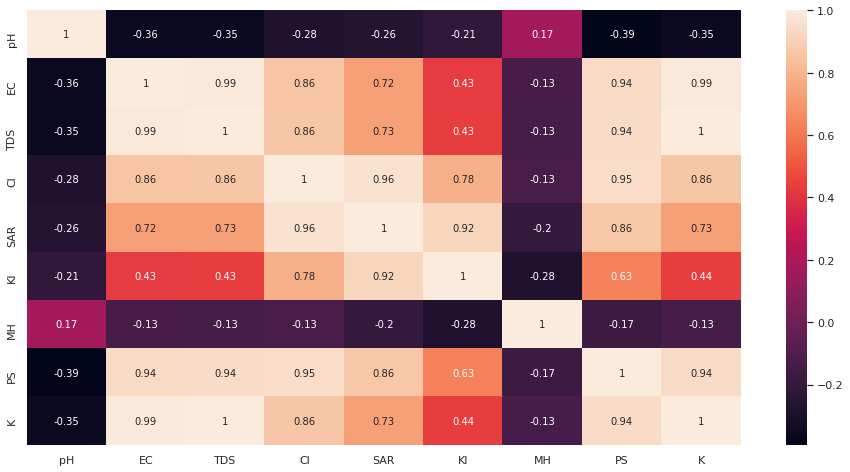

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline
plt.figure(figsize = (16, 8))
sns.heatmap(df_norm.corr(), annot = True)
plt.show()

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
pip install pycaret

**For estimating SAR using other variables**

In [20]:
sar_data=df_norm.drop(['KI', 'MH','PS','K'], axis = 1)

In [21]:
sar_data

,pH,EC,TDS,Cl,SAR
0,1.000000,0.377483,0.444444,0.090740,0.034555
1,0.444444,0.678808,0.725146,0.696810,0.782882
2,0.616667,0.784768,0.725146,0.878910,0.999825
3,0.000000,0.470199,0.473684,0.334159,0.359774
4,0.000000,0.470199,0.473684,0.334159,0.359774
...,...,...,...,...,...
115,0.500000,0.529801,0.590643,0.575720,0.587723
116,0.888889,0.440397,0.415205,0.484980,0.506262
117,1.000000,0.473510,0.479532,0.454630,0.443014
118,0.722222,0.268212,0.269006,0.242490,0.288077


In [22]:
sar_data.corr()

,pH,EC,TDS,Cl,SAR
pH,1.000000,-0.356759,-0.354389,-0.277582,-0.262530
EC,-0.356759,1.000000,0.993519,0.856984,0.722824
TDS,-0.354389,0.993519,1.000000,0.863498,0.728436
Cl,-0.277582,0.856984,0.863498,1.000000,0.963153
SAR,-0.262530,0.722824,0.728436,0.963153,1.000000


In [23]:
from pycaret.regression import *

In [24]:
sar_setup = setup(data = sar_data, target = 'SAR', session_id=123)

,Description,Value
0,session_id,123
1,Target,SAR
2,Original Data,"(120, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(83, 4)"


In [25]:
sar_setup

(None,            pH        EC       TDS        Cl
 74   0.666667  0.258278  0.257310  0.182409
 59   0.833333  0.264901  0.239766  0.089501
 21   0.277778  0.377483  0.374269  0.121710
 60   0.444444  0.155629  0.140351  0.091050
 42   0.777778  0.086093  0.081871  0.091050
 ..        ...       ...       ...       ...
 102  0.572222  0.096026  0.093567  0.242490
 98   0.888889  0.211921  0.222222  0.151440
 92   0.722222  0.139073  0.140351  0.152059
 66   0.666667  0.129139  0.105263  0.181790
 109  0.500000  0.271523  0.292398  0.273459
 
 [83 rows x 4 columns], {'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_groups_param_full'

In [26]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0302,0.0016,0.0393,0.9498,0.0285,0.1286,0.019
br,Bayesian Ridge,0.0301,0.0017,0.0395,0.9490,0.0289,0.1343,0.012
lr,Linear Regression,0.0303,0.0017,0.0395,0.9488,0.0289,0.1338,0.275
lar,Least Angle Regression,0.0303,0.0017,0.0395,0.9488,0.0289,0.1338,0.012
et,Extra Trees Regressor,0.0351,0.0020,0.0439,0.9420,0.0326,0.1390,0.352
gbr,Gradient Boosting Regressor,0.0377,0.0023,0.0463,0.9348,0.0344,0.1543,0.042
rf,Random Forest Regressor,0.0410,0.0030,0.0522,0.9226,0.0375,0.1557,0.408
par,Passive Aggressive Regressor,0.0427,0.0029,0.0524,0.9144,0.0394,0.2172,0.013
ada,AdaBoost Regressor,0.0457,0.0038,0.0590,0.9051,0.0423,0.1869,0.072
omp,Orthogonal Matching Pursuit,0.0458,0.0035,0.0581,0.9003,0.0431,0.2165,0.012


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [27]:
df_norm

,pH,EC,TDS,Cl,SAR,KI,MH,PS,K
0,1.000000,0.377483,0.444444,0.090740,0.034555,0.000000,0.416104,0.219210,0.444355
1,0.444444,0.678808,0.725146,0.696810,0.782882,0.777118,0.424598,0.605575,0.725185
2,0.616667,0.784768,0.725146,0.878910,0.999825,0.987686,0.485579,0.798261,0.725235
3,0.000000,0.470199,0.473684,0.334159,0.359774,0.360802,0.380954,0.413948,0.473665
4,0.000000,0.470199,0.473684,0.334159,0.359774,0.360802,0.380954,0.413948,0.473665
...,...,...,...,...,...,...,...,...,...
115,0.500000,0.529801,0.590643,0.575720,0.587723,0.530462,0.501228,0.537210,0.590659
116,0.888889,0.440397,0.415205,0.484980,0.506262,0.482815,0.523956,0.399075,0.415229
117,1.000000,0.473510,0.479532,0.454630,0.443014,0.380695,0.705042,0.355343,0.479532
118,0.722222,0.268212,0.269006,0.242490,0.288077,0.336633,0.108202,0.188131,0.269003


In [28]:
ki_data=df_norm.drop(['SAR', 'MH','PS','K'], axis = 1)
ki_data

,pH,EC,TDS,Cl,KI
0,1.000000,0.377483,0.444444,0.090740,0.000000
1,0.444444,0.678808,0.725146,0.696810,0.777118
2,0.616667,0.784768,0.725146,0.878910,0.987686
3,0.000000,0.470199,0.473684,0.334159,0.360802
4,0.000000,0.470199,0.473684,0.334159,0.360802
...,...,...,...,...,...
115,0.500000,0.529801,0.590643,0.575720,0.530462
116,0.888889,0.440397,0.415205,0.484980,0.482815
117,1.000000,0.473510,0.479532,0.454630,0.380695
118,0.722222,0.268212,0.269006,0.242490,0.336633


In [29]:
ki_data.corr()

,pH,EC,TDS,Cl,KI
pH,1.000000,-0.356759,-0.354389,-0.277582,-0.209975
EC,-0.356759,1.000000,0.993519,0.856984,0.431231
TDS,-0.354389,0.993519,1.000000,0.863498,0.434908
Cl,-0.277582,0.856984,0.863498,1.000000,0.782201
KI,-0.209975,0.431231,0.434908,0.782201,1.000000


In [30]:
from pycaret.regression import *

In [31]:
ki_setup = setup(data = ki_data, target = 'KI', session_id=234)

,Description,Value
0,session_id,234
1,Target,KI
2,Original Data,"(120, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(83, 4)"


In [32]:
ki_setup

(None,            pH        EC       TDS       Cl
 44   0.777778  0.185430  0.181287  0.06070
 35   1.000000  0.324503  0.304094  0.36358
 114  0.555556  0.605960  0.561404  0.63642
 79   0.833333  0.152318  0.163743  0.12109
 119  0.538889  0.126159  0.140351  0.21214
 ..        ...       ...       ...      ...
 95   0.944444  0.301325  0.257310  0.15144
 57   0.666667  0.192053  0.181287  0.12171
 68   0.722222  0.090066  0.105263  0.18179
 31   0.577778  0.301325  0.298246  0.18179
 72   0.777778  0.072848  0.140351  0.12140
 
 [83 rows x 4 columns], {'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_groups_param_full',
  'fold_pa

In [33]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0636,0.0074,0.0833,0.8022,0.0583,0.2730,0.013
lr,Linear Regression,0.0640,0.0075,0.0837,0.8007,0.0587,0.2721,0.274
huber,Huber Regressor,0.0631,0.0075,0.0836,0.7972,0.0577,0.2498,0.020
gbr,Gradient Boosting Regressor,0.0720,0.0091,0.0930,0.7530,0.0652,0.2978,0.041
et,Extra Trees Regressor,0.0697,0.0097,0.0943,0.7266,0.0657,0.2584,0.358
rf,Random Forest Regressor,0.0738,0.0102,0.0983,0.7146,0.0686,0.3057,0.408
ada,AdaBoost Regressor,0.0863,0.0119,0.1079,0.6881,0.0748,0.3531,0.076
dt,Decision Tree Regressor,0.0833,0.0133,0.1110,0.6161,0.0783,0.3289,0.013
ridge,Ridge Regression,0.1002,0.0169,0.1285,0.5544,0.0916,0.5005,0.013
omp,Orthogonal Matching Pursuit,0.1018,0.0173,0.1292,0.5039,0.0915,0.4541,0.012


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [34]:
mi_data=df_norm.drop(['SAR', 'KI','PS','K'], axis = 1)
mi_data

,pH,EC,TDS,Cl,MH
0,1.000000,0.377483,0.444444,0.090740,0.416104
1,0.444444,0.678808,0.725146,0.696810,0.424598
2,0.616667,0.784768,0.725146,0.878910,0.485579
3,0.000000,0.470199,0.473684,0.334159,0.380954
4,0.000000,0.470199,0.473684,0.334159,0.380954
...,...,...,...,...,...
115,0.500000,0.529801,0.590643,0.575720,0.501228
116,0.888889,0.440397,0.415205,0.484980,0.523956
117,1.000000,0.473510,0.479532,0.454630,0.705042
118,0.722222,0.268212,0.269006,0.242490,0.108202


In [35]:
mi_data.corr()

,pH,EC,TDS,Cl,MH
pH,1.000000,-0.356759,-0.354389,-0.277582,0.170133
EC,-0.356759,1.000000,0.993519,0.856984,-0.131870
TDS,-0.354389,0.993519,1.000000,0.863498,-0.134772
Cl,-0.277582,0.856984,0.863498,1.000000,-0.126258
MH,0.170133,-0.131870,-0.134772,-0.126258,1.000000


In [36]:
from pycaret.regression import *
mi_setup = setup(data = mi_data, target = 'MH', session_id=235)

,Description,Value
0,session_id,235
1,Target,MH
2,Original Data,"(120, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(83, 4)"


In [37]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1335,0.0308,0.1685,-0.1032,0.1141,0.3239,0.356
lasso,Lasso Regression,0.1470,0.0329,0.1783,-0.1685,0.1209,0.3669,0.013
en,Elastic Net,0.1470,0.0329,0.1783,-0.1685,0.1209,0.3669,0.016
llar,Lasso Least Angle Regression,0.1470,0.0329,0.1783,-0.1685,0.1209,0.3669,0.013
br,Bayesian Ridge,0.1471,0.0330,0.1783,-0.1692,0.1210,0.3670,0.014
rf,Random Forest Regressor,0.1440,0.0331,0.1755,-0.1904,0.1181,0.3344,0.409
ada,AdaBoost Regressor,0.1492,0.0336,0.1788,-0.2044,0.1212,0.3561,0.072
ridge,Ridge Regression,0.1506,0.0344,0.1820,-0.2180,0.1234,0.3751,0.012
omp,Orthogonal Matching Pursuit,0.1512,0.0348,0.1830,-0.2341,0.1242,0.3762,0.013
lightgbm,Light Gradient Boosting Machine,0.1498,0.0350,0.1841,-0.2574,0.1246,0.3667,0.020


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=235, verbose=0, warm_start=False)

In [38]:
ps_data=df_norm.drop(['SAR', 'KI','MH','K'], axis = 1)
ps_data

,pH,EC,TDS,Cl,PS
0,1.000000,0.377483,0.444444,0.090740,0.219210
1,0.444444,0.678808,0.725146,0.696810,0.605575
2,0.616667,0.784768,0.725146,0.878910,0.798261
3,0.000000,0.470199,0.473684,0.334159,0.413948
4,0.000000,0.470199,0.473684,0.334159,0.413948
...,...,...,...,...,...
115,0.500000,0.529801,0.590643,0.575720,0.537210
116,0.888889,0.440397,0.415205,0.484980,0.399075
117,1.000000,0.473510,0.479532,0.454630,0.355343
118,0.722222,0.268212,0.269006,0.242490,0.188131


In [39]:
ps_data.corr()

,pH,EC,TDS,Cl,PS
pH,1.000000,-0.356759,-0.354389,-0.277582,-0.394959
EC,-0.356759,1.000000,0.993519,0.856984,0.935150
TDS,-0.354389,0.993519,1.000000,0.863498,0.940721
Cl,-0.277582,0.856984,0.863498,1.000000,0.948725
PS,-0.394959,0.935150,0.940721,0.948725,1.000000


In [40]:
from pycaret.regression import *
ps_setup = setup(data = ps_data, target = 'PS', session_id=231)

,Description,Value
0,session_id,231
1,Target,PS
2,Original Data,"(120, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(83, 4)"


In [41]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0369,0.0024,0.0475,0.8975,0.0342,0.2186,0.356
br,Bayesian Ridge,0.0363,0.0022,0.0457,0.8873,0.0342,0.2329,0.012
lr,Linear Regression,0.0364,0.0022,0.0459,0.8863,0.0343,0.2360,0.013
lar,Least Angle Regression,0.0364,0.0022,0.0459,0.8863,0.0343,0.2360,0.014
huber,Huber Regressor,0.0368,0.0022,0.0461,0.8836,0.0344,0.2385,0.019
knn,K Neighbors Regressor,0.0441,0.0034,0.0567,0.8782,0.0405,0.2451,0.062
ridge,Ridge Regression,0.0398,0.0029,0.0520,0.8764,0.0372,0.2462,0.013
rf,Random Forest Regressor,0.0393,0.0026,0.0500,0.8670,0.0361,0.2327,0.411
ada,AdaBoost Regressor,0.0427,0.0031,0.0539,0.8577,0.0394,0.2804,0.072
gbr,Gradient Boosting Regressor,0.0394,0.0027,0.0510,0.8525,0.0379,0.2291,0.041


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=231, verbose=0, warm_start=False)

In [42]:
k_data=df_norm.drop(['SAR', 'KI','MH','PS'], axis = 1)
k_data

,pH,EC,TDS,Cl,K
0,1.000000,0.377483,0.444444,0.090740,0.444355
1,0.444444,0.678808,0.725146,0.696810,0.725185
2,0.616667,0.784768,0.725146,0.878910,0.725235
3,0.000000,0.470199,0.473684,0.334159,0.473665
4,0.000000,0.470199,0.473684,0.334159,0.473665
...,...,...,...,...,...
115,0.500000,0.529801,0.590643,0.575720,0.590659
116,0.888889,0.440397,0.415205,0.484980,0.415229
117,1.000000,0.473510,0.479532,0.454630,0.479532
118,0.722222,0.268212,0.269006,0.242490,0.269003


In [43]:
k_data.corr()

,pH,EC,TDS,Cl,K
pH,1.000000,-0.356759,-0.354389,-0.277582,-0.354390
EC,-0.356759,1.000000,0.993519,0.856984,0.993519
TDS,-0.354389,0.993519,1.000000,0.863498,1.000000
Cl,-0.277582,0.856984,0.863498,1.000000,0.863573
K,-0.354390,0.993519,1.000000,0.863573,1.000000


In [44]:
from pycaret.regression import *
k_setup = setup(data = k_data, target = 'K', session_id=232)

,Description,Value
0,session_id,232
1,Target,K
2,Original Data,"(120, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(83, 4)"


In [45]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0001,0.014
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0001,0.014
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0002,0.013
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0001,0.013
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0001,0.027
et,Extra Trees Regressor,0.0057,0.0001,0.0091,0.9970,0.0064,0.0394,0.361
gbr,Gradient Boosting Regressor,0.0070,0.0002,0.0114,0.9954,0.0080,0.0564,0.040
rf,Random Forest Regressor,0.0097,0.0003,0.0149,0.9922,0.0102,0.0782,0.408
ada,AdaBoost Regressor,0.0117,0.0003,0.0165,0.9906,0.0120,0.1043,0.074
dt,Decision Tree Regressor,0.0123,0.0009,0.0224,0.9744,0.0151,0.0700,0.017


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)